<a href="https://www.kaggle.com/code/anannoasif/bank-chrn-randcv-own-work?scriptVersionId=159899597" target="_blank"><img align="left" alt="Kaggle" title="Open in Kaggle" src="https://kaggle.com/static/images/open-in-kaggle.svg"></a>

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import cm
import seaborn as sns

%matplotlib inline 

In [2]:
train = pd.read_csv('/kaggle/input/playground-series-s4e1/train.csv')
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [3]:
test = pd.read_csv('/kaggle/input/playground-series-s4e1/test.csv')
test.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary
0,165034,15773898,Lucchese,586,France,Female,23.0,2,0.00,2,0.0,1.0,160976.75
1,165035,15782418,Nott,683,France,Female,46.0,2,0.00,1,1.0,0.0,72549.27
2,165036,15807120,K?,656,France,Female,34.0,7,0.00,2,1.0,0.0,138882.09
3,165037,15808905,O'Donnell,681,France,Male,36.0,8,0.00,1,1.0,0.0,113931.57
4,165038,15607314,Higgins,752,Germany,Male,38.0,10,121263.62,1,1.0,0.0,139431.00


In [4]:
sample = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')
sample.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [5]:
original = pd.read_csv('/kaggle/input/predicting-churn-for-bank-customers/Churn_Modelling.csv')

In [6]:
original.head()

,RowNumber,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [7]:
original = original.rename(columns={'RowNumber': 'id'})

In [8]:
original.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42,2,0.00,1,1,1,101348.88,1
1,2,15647311,Hill,608,Spain,Female,41,1,83807.86,1,0,1,112542.58,0
2,3,15619304,Onio,502,France,Female,42,8,159660.80,3,1,0,113931.57,1
3,4,15701354,Boni,699,France,Female,39,1,0.00,2,0,0,93826.63,0
4,5,15737888,Mitchell,850,Spain,Female,43,2,125510.82,1,1,1,79084.10,0


In [9]:
train.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 165034 entries, 0 to 165033
Data columns (total 14 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               165034 non-null  int64  
 1   CustomerId       165034 non-null  int64  
 2   Surname          165034 non-null  object 
 3   CreditScore      165034 non-null  int64  
 4   Geography        165034 non-null  object 
 5   Gender           165034 non-null  object 
 6   Age              165034 non-null  float64
 7   Tenure           165034 non-null  int64  
 8   Balance          165034 non-null  float64
 9   NumOfProducts    165034 non-null  int64  
 10  HasCrCard        165034 non-null  float64
 11  IsActiveMember   165034 non-null  float64
 12  EstimatedSalary  165034 non-null  float64
 13  Exited           165034 non-null  int64  
dtypes: float64(5), int64(6), object(3)
memory usage: 17.6+ MB


In [10]:
train.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
Exited               int64
dtype: object

In [11]:
train.shape

(165034, 14)

In [12]:
train.describe().T

,count,mean,std,min,25%,50%,75%,max
id,165034.0,8.251650e+04,47641.356500,0.00,41258.25,82516.5,1.237748e+05,165033.00
CustomerId,165034.0,1.569201e+07,71397.816791,15565701.00,15633141.00,15690169.0,1.575682e+07,15815690.00
CreditScore,165034.0,6.564544e+02,80.103340,350.00,597.00,659.0,7.100000e+02,850.00
Age,165034.0,3.812589e+01,8.867205,18.00,32.00,37.0,4.200000e+01,92.00
Tenure,165034.0,5.020353e+00,2.806159,0.00,3.00,5.0,7.000000e+00,10.00
Balance,165034.0,5.547809e+04,62817.663278,0.00,0.00,0.0,1.199395e+05,250898.09
NumOfProducts,165034.0,1.554455e+00,0.547154,1.00,1.00,2.0,2.000000e+00,4.00
HasCrCard,165034.0,7.539537e-01,0.430707,0.00,1.00,1.0,1.000000e+00,1.00
IsActiveMember,165034.0,4.977702e-01,0.499997,0.00,0.00,0.0,1.000000e+00,1.00
EstimatedSalary,165034.0,1.125748e+05,50292.865585,11.58,74637.57,117948.0,1.551525e+05,199992.48


In [13]:
train.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [14]:
train.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [15]:
original.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 14 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   id               10000 non-null  int64  
 1   CustomerId       10000 non-null  int64  
 2   Surname          10000 non-null  object 
 3   CreditScore      10000 non-null  int64  
 4   Geography        10000 non-null  object 
 5   Gender           10000 non-null  object 
 6   Age              10000 non-null  int64  
 7   Tenure           10000 non-null  int64  
 8   Balance          10000 non-null  float64
 9   NumOfProducts    10000 non-null  int64  
 10  HasCrCard        10000 non-null  int64  
 11  IsActiveMember   10000 non-null  int64  
 12  EstimatedSalary  10000 non-null  float64
 13  Exited           10000 non-null  int64  
dtypes: float64(2), int64(9), object(3)
memory usage: 1.1+ MB


In [16]:
test.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 110023 entries, 0 to 110022
Data columns (total 13 columns):
 #   Column           Non-Null Count   Dtype  
---  ------           --------------   -----  
 0   id               110023 non-null  int64  
 1   CustomerId       110023 non-null  int64  
 2   Surname          110023 non-null  object 
 3   CreditScore      110023 non-null  int64  
 4   Geography        110023 non-null  object 
 5   Gender           110023 non-null  object 
 6   Age              110023 non-null  float64
 7   Tenure           110023 non-null  int64  
 8   Balance          110023 non-null  float64
 9   NumOfProducts    110023 non-null  int64  
 10  HasCrCard        110023 non-null  float64
 11  IsActiveMember   110023 non-null  float64
 12  EstimatedSalary  110023 non-null  float64
dtypes: float64(5), int64(5), object(3)
memory usage: 10.9+ MB


In [17]:
original.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                  int64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard            int64
IsActiveMember       int64
EstimatedSalary    float64
Exited               int64
dtype: object

In [18]:
test.dtypes

id                   int64
CustomerId           int64
Surname             object
CreditScore          int64
Geography           object
Gender              object
Age                float64
Tenure               int64
Balance            float64
NumOfProducts        int64
HasCrCard          float64
IsActiveMember     float64
EstimatedSalary    float64
dtype: object

In [19]:
original.shape

(10000, 14)

In [20]:
test.shape

(110023, 13)

In [21]:
original.describe().T

,count,mean,std,min,25%,50%,75%,max
id,10000.0,5.000500e+03,2886.895680,1.00,2500.75,5.000500e+03,7.500250e+03,10000.00
CustomerId,10000.0,1.569094e+07,71936.186123,15565701.00,15628528.25,1.569074e+07,1.575323e+07,15815690.00
CreditScore,10000.0,6.505288e+02,96.653299,350.00,584.00,6.520000e+02,7.180000e+02,850.00
Age,10000.0,3.892180e+01,10.487806,18.00,32.00,3.700000e+01,4.400000e+01,92.00
Tenure,10000.0,5.012800e+00,2.892174,0.00,3.00,5.000000e+00,7.000000e+00,10.00
Balance,10000.0,7.648589e+04,62397.405202,0.00,0.00,9.719854e+04,1.276442e+05,250898.09
NumOfProducts,10000.0,1.530200e+00,0.581654,1.00,1.00,1.000000e+00,2.000000e+00,4.00
HasCrCard,10000.0,7.055000e-01,0.455840,0.00,0.00,1.000000e+00,1.000000e+00,1.00
IsActiveMember,10000.0,5.151000e-01,0.499797,0.00,0.00,1.000000e+00,1.000000e+00,1.00
EstimatedSalary,10000.0,1.000902e+05,57510.492818,11.58,51002.11,1.001939e+05,1.493882e+05,199992.48


In [22]:
test.describe().T

,count,mean,std,min,25%,50%,75%,max
id,110023.0,2.200450e+05,31761.048671,165034.00,1.925395e+05,220045.00,2.475505e+05,275056.00
CustomerId,110023.0,1.569210e+07,71684.990992,15565701.00,1.563286e+07,15690175.00,1.575693e+07,15815690.00
CreditScore,110023.0,6.565308e+02,80.315415,350.00,5.970000e+02,660.00,7.100000e+02,850.00
Age,110023.0,3.812221e+01,8.861550,18.00,3.200000e+01,37.00,4.200000e+01,92.00
Tenure,110023.0,4.996637e+00,2.806148,0.00,3.000000e+00,5.00,7.000000e+00,10.00
Balance,110023.0,5.533361e+04,62788.519675,0.00,0.000000e+00,0.00,1.201456e+05,250898.09
NumOfProducts,110023.0,1.553321e+00,0.544714,1.00,1.000000e+00,2.00,2.000000e+00,4.00
HasCrCard,110023.0,7.530425e-01,0.431244,0.00,1.000000e+00,1.00,1.000000e+00,1.00
IsActiveMember,110023.0,4.952328e-01,0.499980,0.00,0.000000e+00,0.00,1.000000e+00,1.00
EstimatedSalary,110023.0,1.123151e+05,50277.048244,11.58,7.444033e+04,117832.23,1.546314e+05,199992.48


In [23]:
original.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
Exited             0
dtype: int64

In [24]:
test.isna().sum()

id                 0
CustomerId         0
Surname            0
CreditScore        0
Geography          0
Gender             0
Age                0
Tenure             0
Balance            0
NumOfProducts      0
HasCrCard          0
IsActiveMember     0
EstimatedSalary    0
dtype: int64

In [25]:
original.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary', 'Exited'],
      dtype='object')

In [26]:
test.columns

Index(['id', 'CustomerId', 'Surname', 'CreditScore', 'Geography', 'Gender',
       'Age', 'Tenure', 'Balance', 'NumOfProducts', 'HasCrCard',
       'IsActiveMember', 'EstimatedSalary'],
      dtype='object')

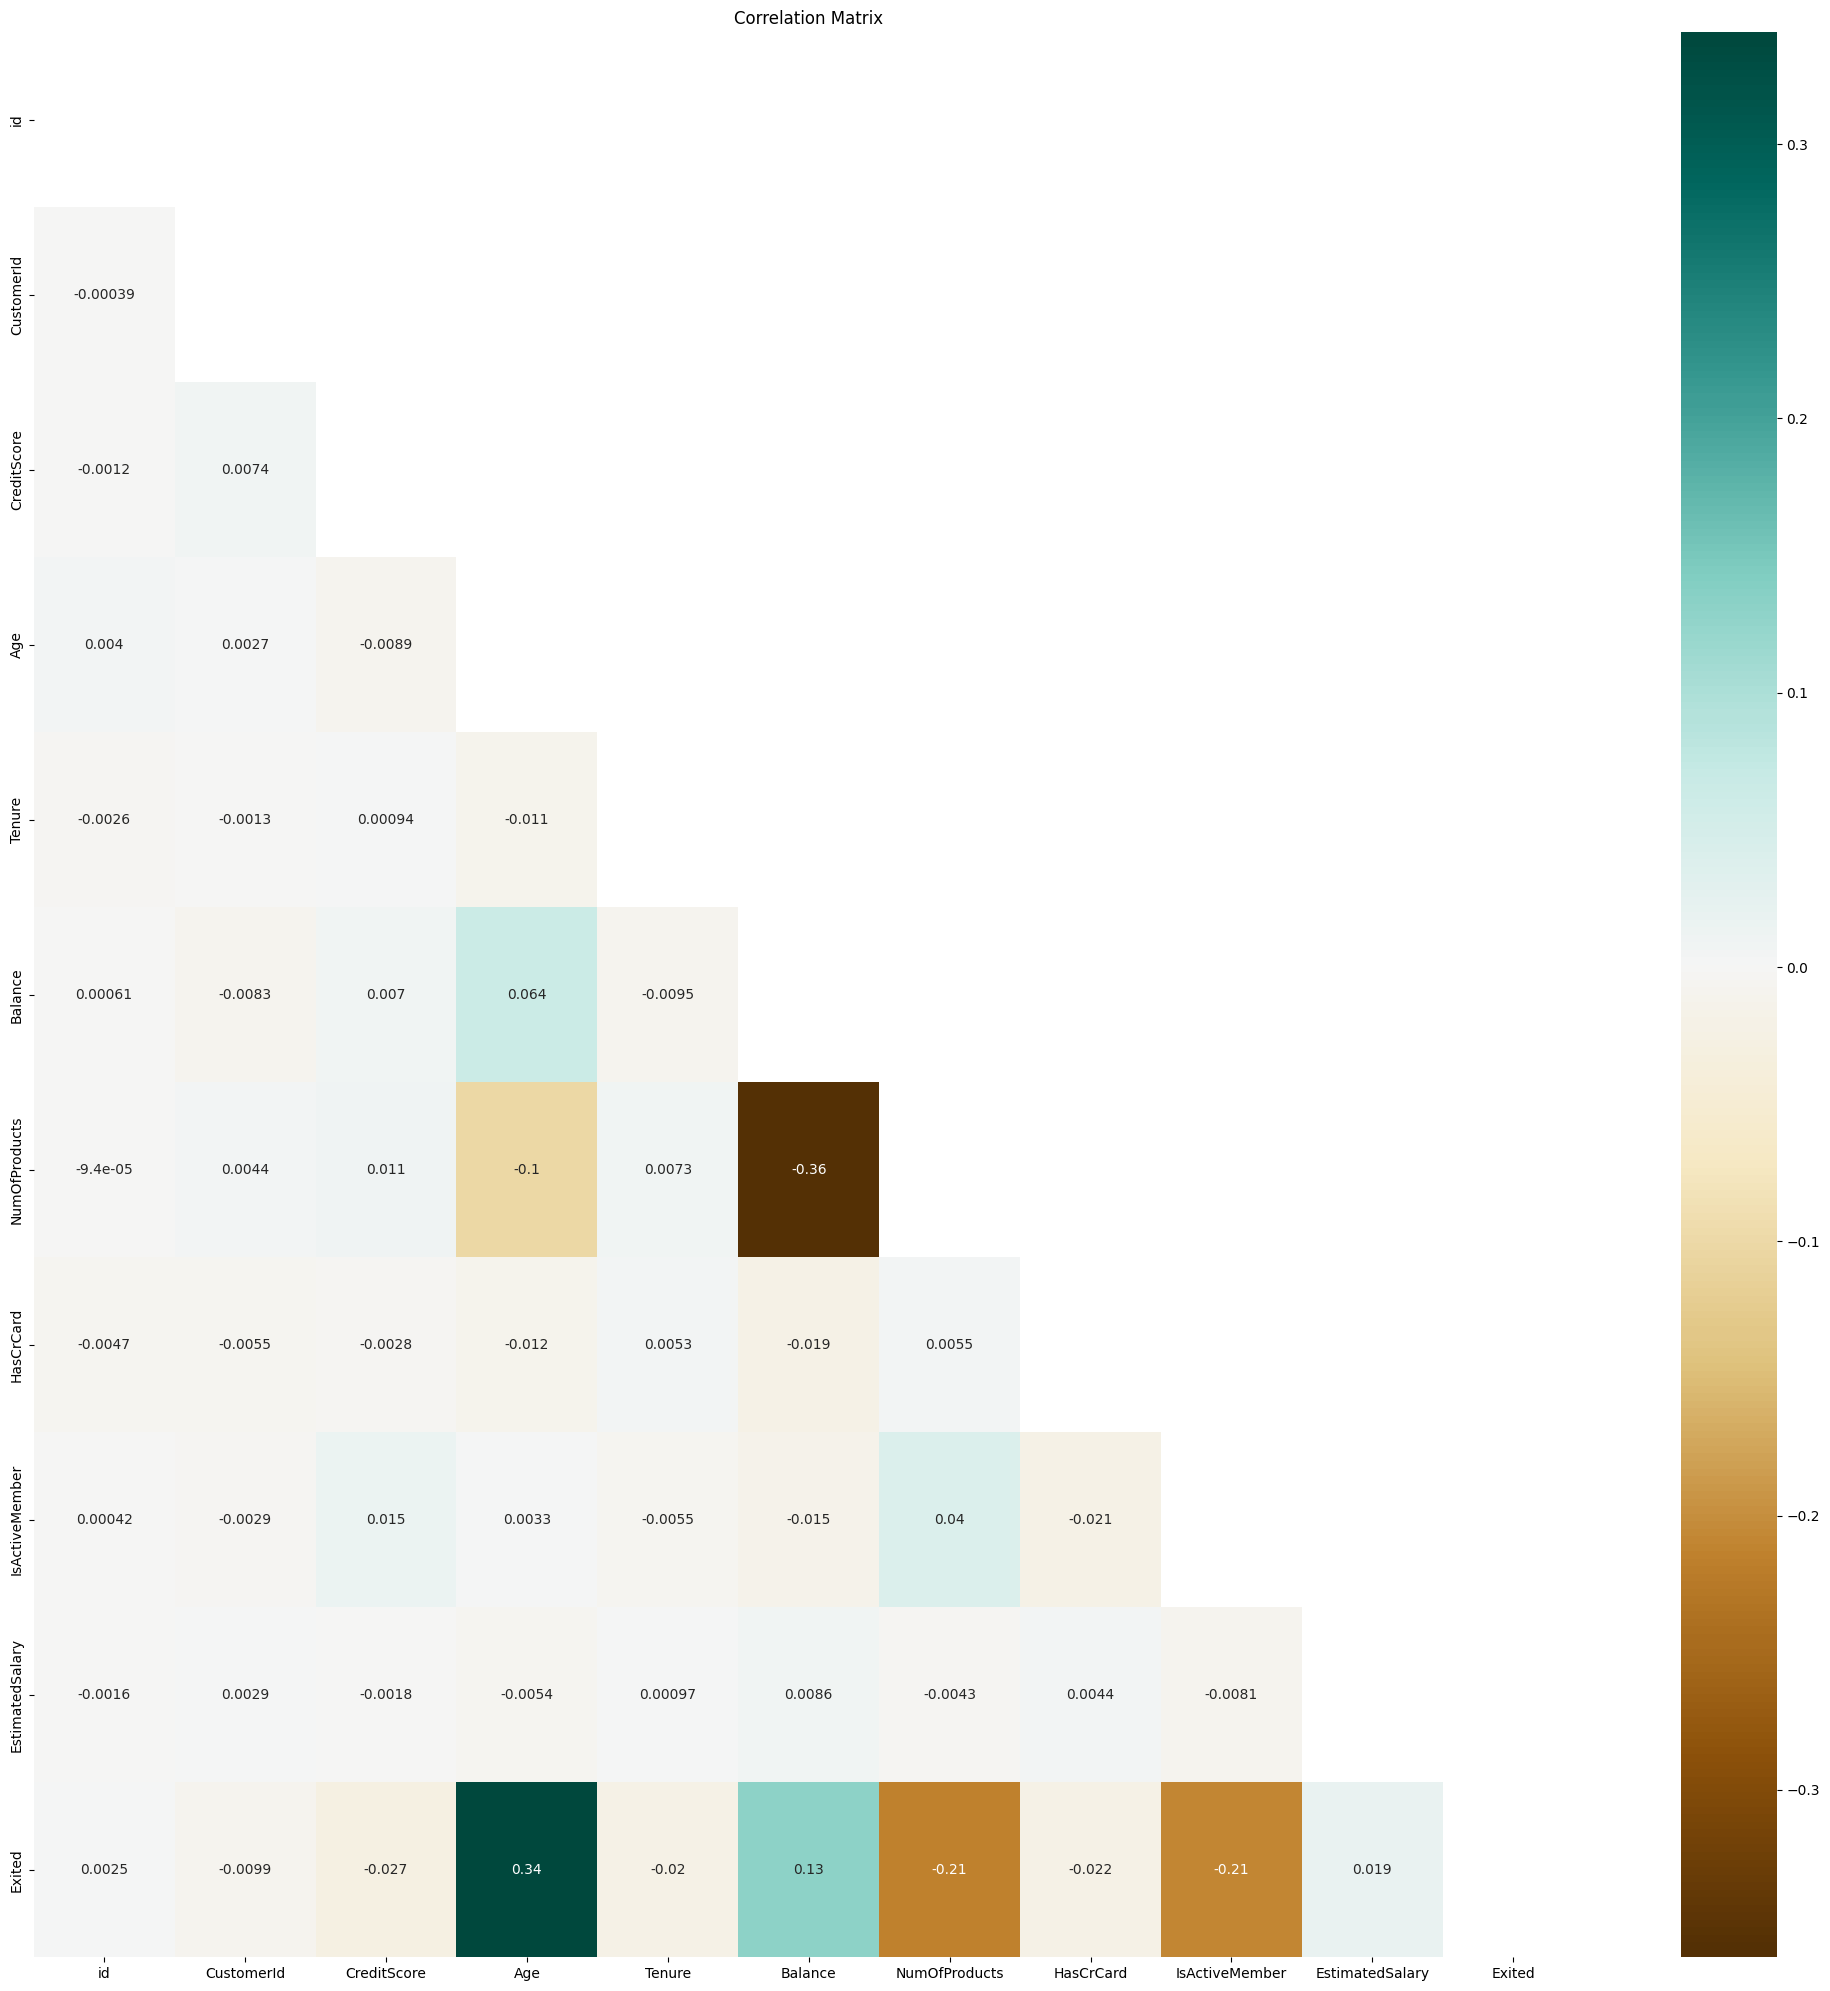

In [27]:
# Selecting numeric columns
numeric_cols = train.select_dtypes(include=[np.number]).columns

# Calculating correlation matrix 
corr = train[numeric_cols].corr()

# Generate a mask 
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set figure size
plt.figure(figsize=(25,25))

# Plot heatmap
sns.heatmap(corr, 
            xticklabels=corr.columns,
            yticklabels=corr.columns,
            mask=mask,
            annot=True,
            cmap='BrBG',
            center=0)

plt.title('Correlation Matrix')
plt.show()

In [28]:
train['Age'].unique()

array([33.  , 40.  , 34.  , 36.  , 30.  , 37.  , 43.  , 27.  , 71.  ,
       47.  , 25.  , 55.  , 61.  , 35.  , 41.  , 44.  , 26.  , 39.  ,
       31.  , 58.  , 49.  , 32.  , 50.  , 28.  , 45.  , 52.  , 29.  ,
       38.  , 54.  , 56.  , 46.  , 42.  , 64.  , 20.  , 21.  , 23.  ,
       48.  , 59.  , 51.  , 24.  , 53.  , 62.  , 57.  , 22.  , 66.  ,
       67.  , 19.  , 73.  , 60.  , 63.  , 65.  , 75.  , 68.  , 69.  ,
       76.  , 18.  , 70.  , 81.  , 74.  , 72.  , 77.  , 82.  , 79.  ,
       92.  , 80.  , 78.  , 83.  , 36.44, 85.  , 32.34, 84.  ])

In [29]:
train['Age'].nunique()

71

In [30]:
original['Age'].unique()

array([42, 41, 39, 43, 44, 50, 29, 27, 31, 24, 34, 25, 35, 45, 58, 32, 38,
       46, 36, 33, 40, 51, 61, 49, 37, 19, 66, 56, 26, 21, 55, 75, 22, 30,
       28, 65, 48, 52, 57, 73, 47, 54, 72, 20, 67, 79, 62, 53, 80, 59, 68,
       23, 60, 70, 63, 64, 18, 82, 69, 74, 71, 76, 77, 88, 85, 84, 78, 81,
       92, 83])

In [31]:
original['Age'].nunique()

70

In [32]:
original['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [33]:
train['Geography'].unique()

array(['France', 'Spain', 'Germany'], dtype=object)

In [34]:
original['Geography'].nunique()

3

In [35]:
train['Geography'].nunique()

3

In [36]:
train.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,0,15674932,Okwudilichukwu,668,France,Male,33.0,3,0.00,2,1.0,0.0,181449.97,0
1,1,15749177,Okwudiliolisa,627,France,Male,33.0,1,0.00,2,1.0,1.0,49503.50,0
2,2,15694510,Hsueh,678,France,Male,40.0,10,0.00,2,1.0,0.0,184866.69,0
3,3,15741417,Kao,581,France,Male,34.0,2,148882.54,1,1.0,1.0,84560.88,0
4,4,15766172,Chiemenam,716,Spain,Male,33.0,5,0.00,2,1.0,1.0,15068.83,0


In [37]:
train['Exited'].nunique()

2

In [38]:
df = pd.concat([original, train, test])

In [39]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,Hargrave,619,France,Female,42.0,2,0.00,1,1.0,1.0,101348.88,1.0
1,2,15647311,Hill,608,Spain,Female,41.0,1,83807.86,1,0.0,1.0,112542.58,0.0
2,3,15619304,Onio,502,France,Female,42.0,8,159660.80,3,1.0,0.0,113931.57,1.0
3,4,15701354,Boni,699,France,Female,39.0,1,0.00,2,0.0,0.0,93826.63,0.0
4,5,15737888,Mitchell,850,Spain,Female,43.0,2,125510.82,1,1.0,1.0,79084.10,0.0


In [40]:
df.shape

(285057, 14)

In [41]:
df.isna().sum()

id                      0
CustomerId              0
Surname                 0
CreditScore             0
Geography               0
Gender                  0
Age                     0
Tenure                  0
Balance                 0
NumOfProducts           0
HasCrCard               0
IsActiveMember          0
EstimatedSalary         0
Exited             110023
dtype: int64

In [42]:
df = df.drop_duplicates()
df.shape, train.shape,original.shape

((285057, 14), (165034, 14), (10000, 14))

In [43]:
from sklearn.preprocessing import LabelEncoder
labelencoder = LabelEncoder()

In [44]:
df['Surname'] = labelencoder.fit_transform(df['Surname'])
df['Geography'] = labelencoder.fit_transform(df['Geography'])
df['Gender'] = labelencoder.fit_transform(df['Gender'])

In [45]:
df.head()

,id,CustomerId,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1,15634602,1115,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1.0
1,2,15647311,1177,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0.0
2,3,15619304,2040,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1.0
3,4,15701354,289,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0.0
4,5,15737888,1822,850,2,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0.0


In [46]:
df.drop(['id', 'CustomerId'], axis=1, inplace=True)

In [47]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited
0,1115,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1.0
1,1177,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0.0
2,2040,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1.0
3,289,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0.0
4,1822,850,2,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0.0


In [48]:
df['Geography'].unique()

array([0, 2, 1])

In [49]:
def new_features(df):
    
    df['Age_Range'] = (df['Age'] // 10) * 10
    
    df['Senior_Citizen'] = df['Age'].apply(lambda x: '1' if x >= 60 else '0')
    
    df['Balance_Salary_Ratio'] = df['Balance'] / df['EstimatedSalary']
    
    df['Credit_Tier'] = pd.cut(df['CreditScore'], 
                           bins=[0, 600, 700, 750, 800, 850], 
                           labels=['0', '1', '2', '3', '4'])
    
    df['Active_CreditCard_User'] = df['HasCrCard'] * df['IsActiveMember']

    df['Active_CC_User_by_Geo'] = df['Active_CreditCard_User'] * df['Geography']

    df['Active_CC_User_by_Gender'] = df['Active_CreditCard_User'] * df['Gender'] 
    
    df['Customer_Status'] = df['Tenure'].map(lambda x: 0 if x < 2 else 1)
    
    return df

In [50]:
df = new_features(df)

In [51]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Range,Senior_Citizen,Balance_Salary_Ratio,Credit_Tier,Active_CreditCard_User,Active_CC_User_by_Geo,Active_CC_User_by_Gender,Customer_Status
0,1115,619,0,0,42.0,2,0.00,1,1.0,1.0,101348.88,1.0,40.0,0,0.000000,1,1.0,0.0,0.0,1
1,1177,608,2,0,41.0,1,83807.86,1,0.0,1.0,112542.58,0.0,40.0,0,0.744677,1,0.0,0.0,0.0,0
2,2040,502,0,0,42.0,8,159660.80,3,1.0,0.0,113931.57,1.0,40.0,0,1.401375,0,0.0,0.0,0.0,1
3,289,699,0,0,39.0,1,0.00,2,0.0,0.0,93826.63,0.0,30.0,0,0.000000,1,0.0,0.0,0.0,0
4,1822,850,2,0,43.0,2,125510.82,1,1.0,1.0,79084.10,0.0,40.0,0,1.587055,4,1.0,2.0,0.0,1


In [52]:
df.isna().sum()

Surname                          0
CreditScore                      0
Geography                        0
Gender                           0
Age                              0
Tenure                           0
Balance                          0
NumOfProducts                    0
HasCrCard                        0
IsActiveMember                   0
EstimatedSalary                  0
Exited                      110023
Age_Range                        0
Senior_Citizen                   0
Balance_Salary_Ratio             0
Credit_Tier                      0
Active_CreditCard_User           0
Active_CC_User_by_Geo            0
Active_CC_User_by_Gender         0
Customer_Status                  0
dtype: int64

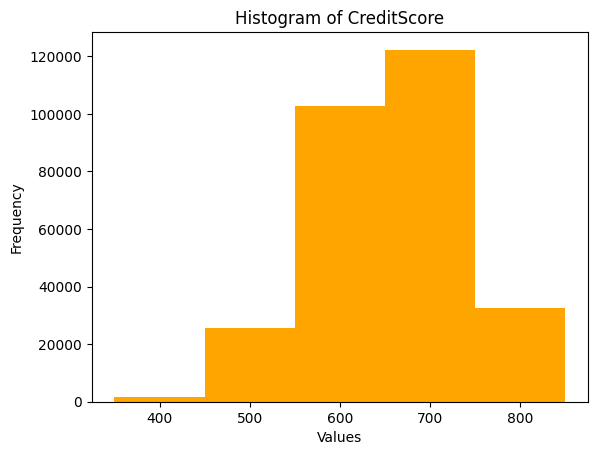

In [53]:
plt.hist(df['CreditScore'], bins=5, color='orange') 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of CreditScore')

plt.show()

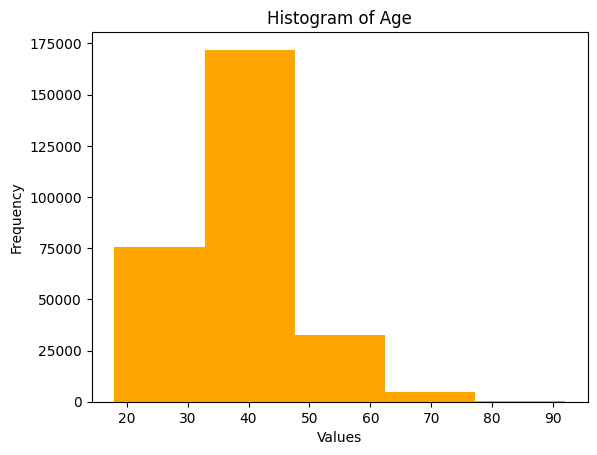

In [54]:
plt.hist(df['Age'], bins=5, color='orange') 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Age')

plt.show()

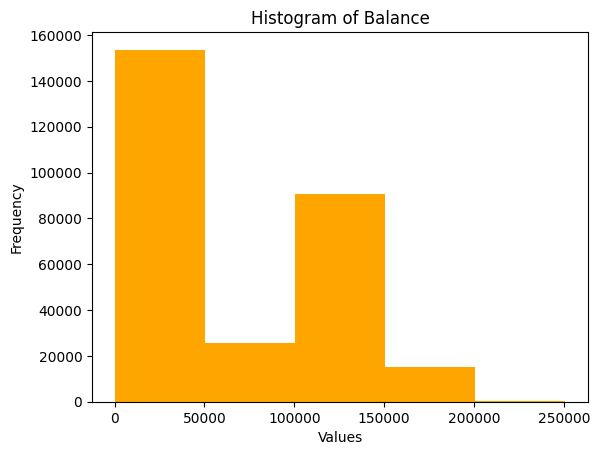

In [55]:
plt.hist(df['Balance'], bins=5, color='orange') 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of Balance')

plt.show()

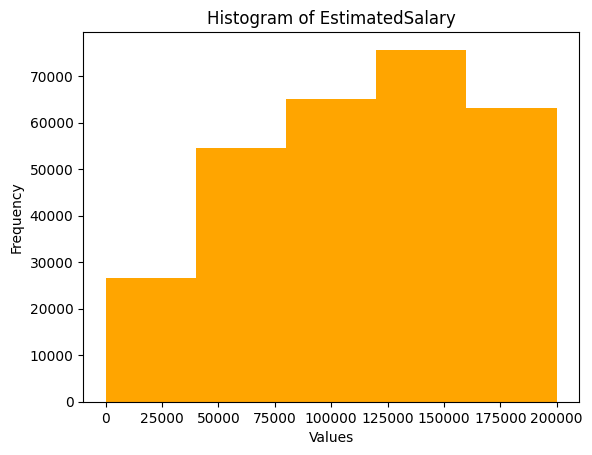

In [56]:
plt.hist(df['EstimatedSalary'], bins=5, color='orange') 

plt.xlabel('Values')
plt.ylabel('Frequency')
plt.title('Histogram of EstimatedSalary')

plt.show()

In [57]:
from sklearn.preprocessing import PowerTransformer

pt = PowerTransformer()


cols_to_transform = ['Age', 'CreditScore']

df[cols_to_transform] = pt.fit_transform(df[cols_to_transform])

In [58]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Range,Senior_Citizen,Balance_Salary_Ratio,Credit_Tier,Active_CreditCard_User,Active_CC_User_by_Geo,Active_CC_User_by_Gender,Customer_Status
0,1115,-0.470035,0,0,0.562051,2,0.00,1,1.0,1.0,101348.88,1.0,40.0,0,0.000000,1,1.0,0.0,0.0,1
1,1177,-0.604824,2,0,0.457613,1,83807.86,1,0.0,1.0,112542.58,0.0,40.0,0,0.744677,1,0.0,0.0,0.0,0
2,2040,-1.881974,0,0,0.562051,8,159660.80,3,1.0,0.0,113931.57,1.0,40.0,0,1.401375,0,0.0,0.0,0.0,1
3,289,0.521898,0,0,0.238875,1,0.00,2,0.0,0.0,93826.63,0.0,30.0,0,0.000000,1,0.0,0.0,0.0,0
4,1822,2.444879,2,0,0.663432,2,125510.82,1,1.0,1.0,79084.10,0.0,40.0,0,1.587055,4,1.0,2.0,0.0,1


In [59]:
df.dtypes

Surname                        int64
CreditScore                  float64
Geography                      int64
Gender                         int64
Age                          float64
Tenure                         int64
Balance                      float64
NumOfProducts                  int64
HasCrCard                    float64
IsActiveMember               float64
EstimatedSalary              float64
Exited                       float64
Age_Range                    float64
Senior_Citizen                object
Balance_Salary_Ratio         float64
Credit_Tier                 category
Active_CreditCard_User       float64
Active_CC_User_by_Geo        float64
Active_CC_User_by_Gender     float64
Customer_Status                int64
dtype: object

In [60]:
df['Senior_Citizen'].unique()

array(['0', '1'], dtype=object)

In [61]:
df['Credit_Tier'].unique()

['1', '0', '4', '2', '3']
Categories (5, object): ['0' < '1' < '2' < '3' < '4']

In [62]:
df['Senior_Citizen'] = df['Senior_Citizen'].astype(int)

In [63]:
df['Credit_Tier'] = labelencoder.fit_transform(df['Credit_Tier'])

In [64]:
df['Senior_Citizen'].unique()

array([0, 1])

In [65]:
df['Credit_Tier'].unique()

array([1, 0, 4, 2, 3])

In [66]:
df.dtypes

Surname                       int64
CreditScore                 float64
Geography                     int64
Gender                        int64
Age                         float64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                   float64
IsActiveMember              float64
EstimatedSalary             float64
Exited                      float64
Age_Range                   float64
Senior_Citizen                int64
Balance_Salary_Ratio        float64
Credit_Tier                   int64
Active_CreditCard_User      float64
Active_CC_User_by_Geo       float64
Active_CC_User_by_Gender    float64
Customer_Status               int64
dtype: object

In [67]:
df.head()

,Surname,CreditScore,Geography,Gender,Age,Tenure,Balance,NumOfProducts,HasCrCard,IsActiveMember,EstimatedSalary,Exited,Age_Range,Senior_Citizen,Balance_Salary_Ratio,Credit_Tier,Active_CreditCard_User,Active_CC_User_by_Geo,Active_CC_User_by_Gender,Customer_Status
0,1115,-0.470035,0,0,0.562051,2,0.00,1,1.0,1.0,101348.88,1.0,40.0,0,0.000000,1,1.0,0.0,0.0,1
1,1177,-0.604824,2,0,0.457613,1,83807.86,1,0.0,1.0,112542.58,0.0,40.0,0,0.744677,1,0.0,0.0,0.0,0
2,2040,-1.881974,0,0,0.562051,8,159660.80,3,1.0,0.0,113931.57,1.0,40.0,0,1.401375,0,0.0,0.0,0.0,1
3,289,0.521898,0,0,0.238875,1,0.00,2,0.0,0.0,93826.63,0.0,30.0,0,0.000000,1,0.0,0.0,0.0,0
4,1822,2.444879,2,0,0.663432,2,125510.82,1,1.0,1.0,79084.10,0.0,40.0,0,1.587055,4,1.0,2.0,0.0,1


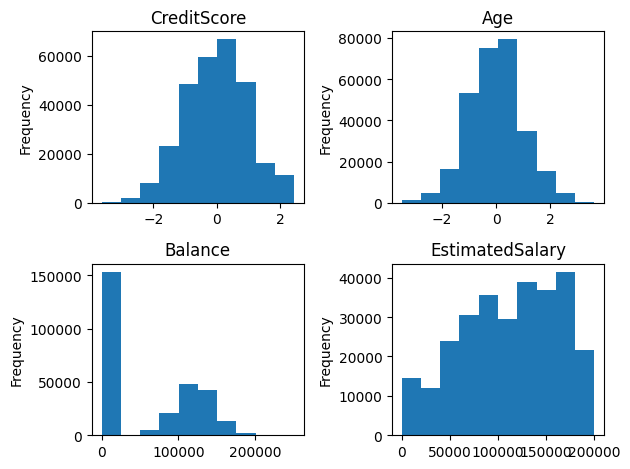

In [68]:
fig, axes = plt.subplots(nrows=2, ncols=2)

df['CreditScore'].plot.hist(ax=axes[0,0])
axes[0,0].set_title('CreditScore')

df['Age'].plot.hist(ax=axes[0,1]) 
axes[0,1].set_title('Age')

df['Balance'].plot.hist(ax=axes[1,0])
axes[1,0].set_title('Balance')

df['EstimatedSalary'].plot.hist(ax=axes[1,1])
axes[1,1].set_title('EstimatedSalary')

fig.tight_layout()
plt.show()

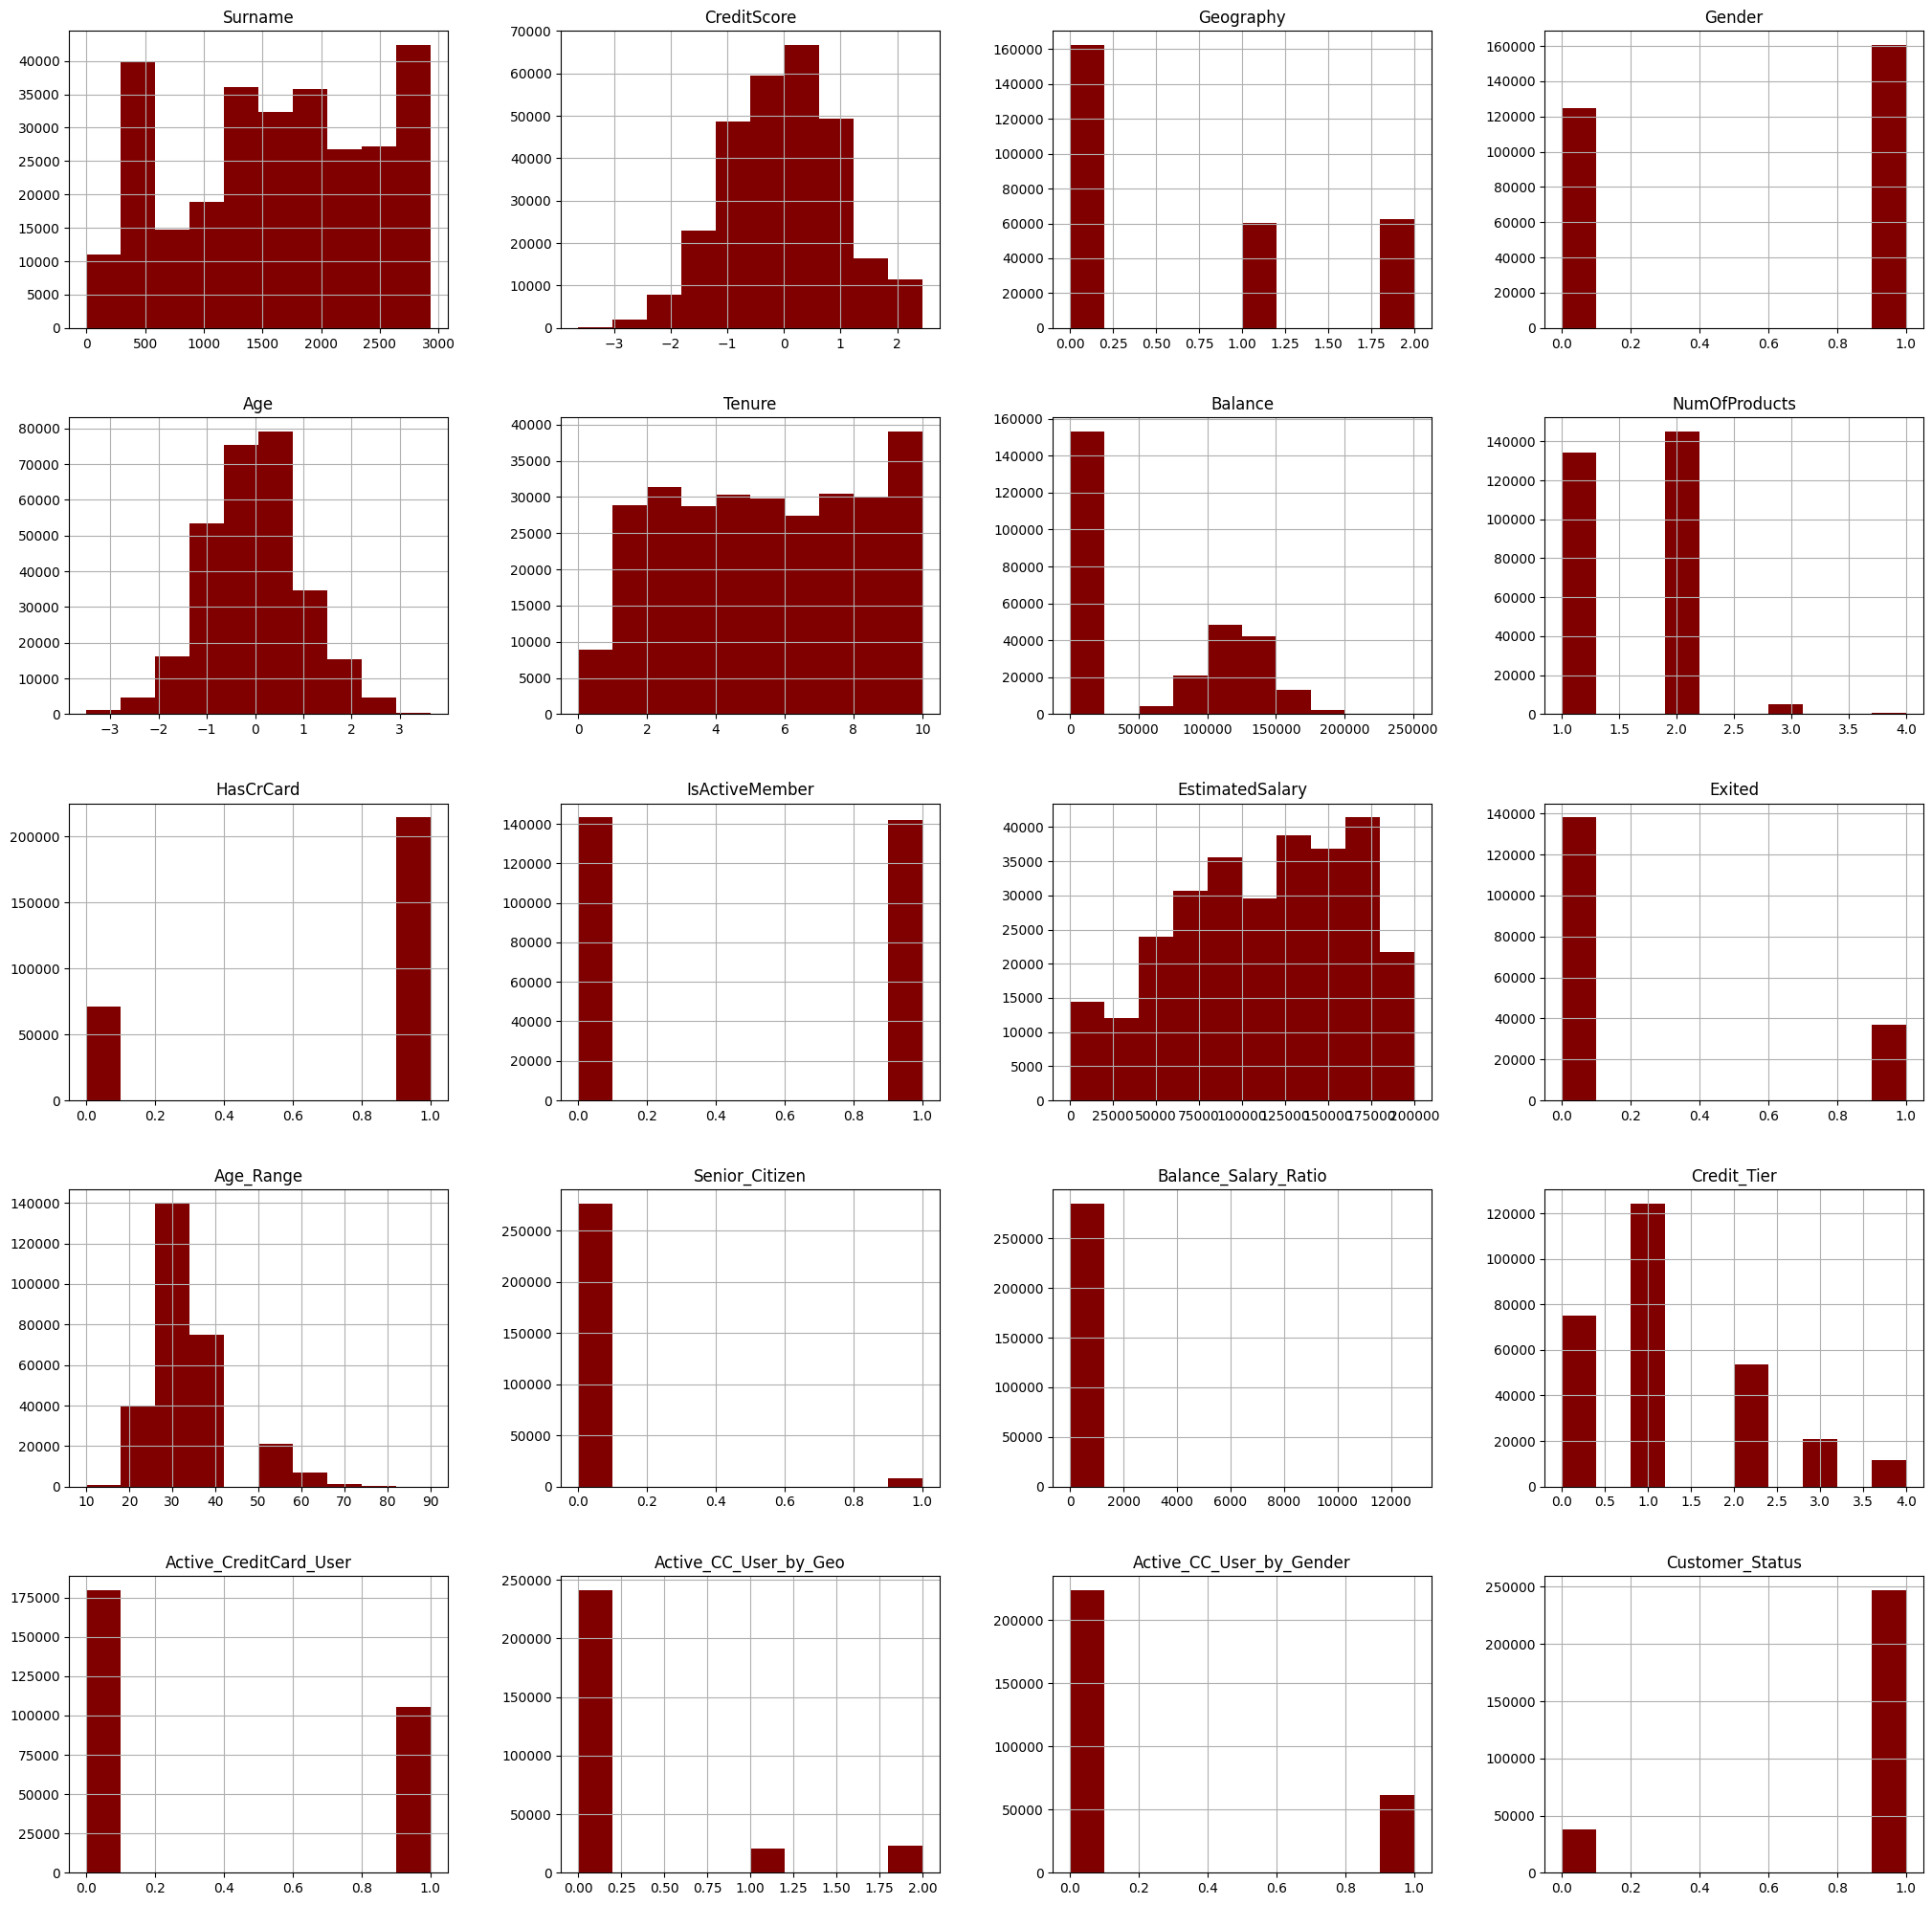

In [69]:
df.hist(figsize=(25, 25), color = 'maroon')
plt.show()

In [70]:
df['Tenure'].nunique()

11

In [71]:
df.dtypes

Surname                       int64
CreditScore                 float64
Geography                     int64
Gender                        int64
Age                         float64
Tenure                        int64
Balance                     float64
NumOfProducts                 int64
HasCrCard                   float64
IsActiveMember              float64
EstimatedSalary             float64
Exited                      float64
Age_Range                   float64
Senior_Citizen                int64
Balance_Salary_Ratio        float64
Credit_Tier                   int64
Active_CreditCard_User      float64
Active_CC_User_by_Geo       float64
Active_CC_User_by_Gender    float64
Customer_Status               int64
dtype: object

In [72]:
df.isna().sum()

Surname                          0
CreditScore                      0
Geography                        0
Gender                           0
Age                              0
Tenure                           0
Balance                          0
NumOfProducts                    0
HasCrCard                        0
IsActiveMember                   0
EstimatedSalary                  0
Exited                      110023
Age_Range                        0
Senior_Citizen                   0
Balance_Salary_Ratio             0
Credit_Tier                      0
Active_CreditCard_User           0
Active_CC_User_by_Geo            0
Active_CC_User_by_Gender         0
Customer_Status                  0
dtype: int64

In [73]:
# df = df.drop('Surname', axis=1)

In [74]:
df_test = df[df['Exited'].isnull()]
df_train = df[~df['Exited'].isnull()]

In [75]:
df_train.shape

(175034, 20)

In [76]:
df_test.shape

(110023, 20)

In [77]:
X = df_train.drop('Exited', axis=1)
y = df_train['Exited']

In [78]:
df_test = df_test.drop('Exited', axis=1)

In [79]:
from sklearn.linear_model import LogisticRegression 
from sklearn.ensemble import StackingClassifier
from sklearn.metrics import log_loss, accuracy_score 
from sklearn.model_selection import train_test_split, KFold, RandomizedSearchCV
from xgboost import XGBClassifier
from lightgbm import LGBMClassifier
from catboost import CatBoostClassifier
from scipy.stats import uniform

# Split the data into training, validation and testing sets
X_train, X_val, y_train, y_val = train_test_split(X, y, test_size=0.2, random_state=32)
X_val, X_test, y_val, y_test = train_test_split(X_val, y_val, test_size=0.4, random_state=32)

In [80]:
# Define the parameter grid for XGBoost
param_grid_xgb = {
    'learning_rate': [0.01, 0.1, 0.125, 0.15, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create an XGBoost classifier
xgb_model = XGBClassifier()

# Perform random search
xgb_random_search = RandomizedSearchCV(xgb_model, param_distributions=param_grid_xgb, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
xgb_random_search.fit(X_train, y_train)

# Get the best parameters
best_params_xgb = xgb_random_search.best_params_

print(best_params_xgb)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 0.9, 'n_estimators': 200, 'max_depth': 5, 'learning_rate': 0.15, 'colsample_bytree': 0.8}


In [81]:
# Define the parameter grid for LightGBM
param_grid_lgbm = {
    'learning_rate': [0.01, 0.1, 0.125, 0.15, 0.2, 0.3],
    'max_depth': [3, 4, 5, 6, 7, 8, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bytree': [0.8, 0.9, 1.0],
    'n_estimators': [100, 200, 300, 400, 500]
}

# Create a LGBM classifier
lgbm_model = LGBMClassifier()

# Perform random search
lgbm_random_search = RandomizedSearchCV(lgbm_model, param_distributions=param_grid_lgbm, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
lgbm_random_search.fit(X_train, y_train)

# Get the best parameters
best_params_lgbm = lgbm_random_search.best_params_

print(best_params_lgbm)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
{'subsample': 1.0, 'n_estimators': 400, 'max_depth': 3, 'learning_rate': 0.2, 'colsample_bytree': 0.8}


In [82]:
# Define the parameter grid for CatBoost
param_grid_catboost = {
    'learning_rate': [0.01, 0.1, 0.125, 0.15, 0.2, 0.3],
    'depth': [3, 4, 5, 6, 7, 8, 9],
    'subsample': [0.8, 0.9, 1.0],
    'colsample_bylevel': [0.8, 0.9, 1.0],
    'iterations': [100, 200, 300, 400, 500]
}

# Create a CatBoost classifier
catboost_model = CatBoostClassifier()

# Perform random search
catboost_random_search = RandomizedSearchCV(catboost_model, param_distributions=param_grid_catboost, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
catboost_random_search.fit(X_train, y_train)

# Get the best parameters
best_params_catboost = catboost_random_search.best_params_

print(best_params_catboost)

Fitting 5 folds for each of 10 candidates, totalling 50 fits
0:	learn: 0.6833383	total: 77.5ms	remaining: 15.4s
1:	learn: 0.6738663	total: 105ms	remaining: 10.4s
2:	learn: 0.6643567	total: 127ms	remaining: 8.37s
3:	learn: 0.6555025	total: 150ms	remaining: 7.35s
4:	learn: 0.6469113	total: 170ms	remaining: 6.63s
5:	learn: 0.6382761	total: 191ms	remaining: 6.19s
6:	learn: 0.6304864	total: 213ms	remaining: 5.87s
7:	learn: 0.6221673	total: 235ms	remaining: 5.63s
8:	learn: 0.6142149	total: 257ms	remaining: 5.45s
9:	learn: 0.6066267	total: 280ms	remaining: 5.32s
10:	learn: 0.5991999	total: 300ms	remaining: 5.16s
11:	learn: 0.5919392	total: 323ms	remaining: 5.05s
12:	learn: 0.5853137	total: 344ms	remaining: 4.95s
13:	learn: 0.5785574	total: 365ms	remaining: 4.85s
14:	learn: 0.5721455	total: 385ms	remaining: 4.75s
15:	learn: 0.5657318	total: 405ms	remaining: 4.66s
16:	learn: 0.5594862	total: 426ms	remaining: 4.58s
17:	learn: 0.5532686	total: 445ms	remaining: 4.5s
18:	learn: 0.5474512	total: 464

In [83]:
# Define the parameter grid for Logistic Regression
param_grid_logreg = {
    'penalty': ['l1', 'l2', 'elasticnet', 'none'],
    'C': uniform(loc=0, scale=4),  # Continuous distribution for regularization parameter
    'solver': ['newton-cg', 'lbfgs', 'liblinear', 'sag', 'saga'],
    'max_iter': [100, 200, 300, 400, 500]
}

# Create a Logistic Regression model
logreg_model = LogisticRegression()

# Perform random search
logreg_random_search = RandomizedSearchCV(logreg_model, param_distributions=param_grid_logreg, n_iter=10, scoring='accuracy', cv=5, verbose=1, n_jobs=-1)
logreg_random_search.fit(X_train, y_train)

# Get the best parameters
best_params_logreg = logreg_random_search.best_params_

print(best_params_logreg)

Fitting 5 folds for each of 10 candidates, totalling 50 fits


/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(
/opt/conda/lib/pyth

{'C': 2.5862912934936793, 'max_iter': 100, 'penalty': 'none', 'solver': 'newton-cg'}


/opt/conda/lib/python3.10/site-packages/sklearn/utils/optimize.py:210: ConvergenceWarning: newton-cg failed to converge. Increase the number of iterations.
  warnings.warn(


In [84]:
xgb = XGBClassifier(**best_params_xgb)
lgbm = LGBMClassifier(**best_params_lgbm)
cat = CatBoostClassifier(**best_params_catboost)

lr = LogisticRegression(**best_params_logreg)

# Update level0 list with randomly searched models
level0 = [('xgb', xgb), 
          ('lgbm', lgbm),
          ('cat', cat)]

# Define meta learner model
level1 = lr

kf = KFold(n_splits=5, shuffle=True, random_state=32)

# Define the stacking ensemble
model = StackingClassifier(estimators=level0, final_estimator=level1, cv=kf)

# Fit the model on the training data
model.fit(X_train, y_train)

# Make predictions on validation and test set
y_val_pred = model.predict(X_val)
y_test_pred = model.predict(X_test)

# Evaluate on validation set
y_val_pred_proba = model.predict_proba(X_val)

# Evaluate on test set
y_test_pred_proba = model.predict_proba(X_test)

# Print out the necessary evaluation metrics for validation set
print(f'Test Accuracy: {accuracy_score(y_test, y_test_pred)}')
print(f'Test Log Loss: {log_loss(y_test, y_test_pred_proba)}')
print(f'Validation Accuracy: {accuracy_score(y_val, y_val_pred)}')
print(f'Validation Log Loss: {log_loss(y_val, y_val_pred_proba)}')

# Export the predictions in probabilistic form in 1 column only for the test set
predictions_df = pd.DataFrame(y_test_pred_proba[:, 1], columns=['Predictions'])
predictions_df.to_csv('test_predictions.csv', index=False)


0:	learn: 0.5341710	total: 21.7ms	remaining: 6.48s
1:	learn: 0.4499595	total: 44.9ms	remaining: 6.68s
2:	learn: 0.4043005	total: 66.6ms	remaining: 6.59s
3:	learn: 0.3756178	total: 87.4ms	remaining: 6.46s
4:	learn: 0.3605702	total: 108ms	remaining: 6.36s
5:	learn: 0.3514840	total: 126ms	remaining: 6.18s
6:	learn: 0.3438736	total: 145ms	remaining: 6.07s
7:	learn: 0.3386070	total: 165ms	remaining: 6s
8:	learn: 0.3354358	total: 186ms	remaining: 6s
9:	learn: 0.3340009	total: 205ms	remaining: 5.93s
10:	learn: 0.3309555	total: 225ms	remaining: 5.92s
11:	learn: 0.3291234	total: 246ms	remaining: 5.89s
12:	learn: 0.3272791	total: 266ms	remaining: 5.87s
13:	learn: 0.3263545	total: 285ms	remaining: 5.83s
14:	learn: 0.3256563	total: 303ms	remaining: 5.75s
15:	learn: 0.3249550	total: 322ms	remaining: 5.72s
16:	learn: 0.3244503	total: 343ms	remaining: 5.71s
17:	learn: 0.3240155	total: 363ms	remaining: 5.69s
18:	learn: 0.3232981	total: 385ms	remaining: 5.69s
19:	learn: 0.3229971	total: 407ms	remaining

/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1173: FutureWarning: `penalty='none'`has been deprecated in 1.2 and will be removed in 1.4. To keep the past behaviour, set `penalty=None`.
  warnings.warn(
/opt/conda/lib/python3.10/site-packages/sklearn/linear_model/_logistic.py:1181: UserWarning: Setting penalty=None will ignore the C and l1_ratio parameters
  warnings.warn(


Test Accuracy: 0.8656716417910447
Test Log Loss: 0.33073842588938424
Validation Accuracy: 0.8672157684250619
Validation Log Loss: 0.3233250442279172


In [85]:
test_predictions_output = pd.read_csv('test_predictions.csv')
test_predictions_output.head()

,Predictions
0,0.117927
1,0.138659
2,0.158920
3,0.722090
4,0.063544


In [86]:
sample.head()

,id,Exited
0,165034,0.5
1,165035,0.5
2,165036,0.5
3,165037,0.5
4,165038,0.5


In [87]:
# Get predictions on external test data
external_pred_proba = model.predict_proba(df_test)  

# Get id column from sample submission
sample_sub = pd.read_csv('/kaggle/input/playground-series-s4e1/sample_submission.csv')  
id_column = sample_sub['id']

# Create predictions dataframe
external_predictions_df = pd.DataFrame({'id': id_column, 'prediction': external_pred_proba[:,1]})  

# Export to CSV
external_predictions_df.to_csv('external_predictions.csv', index=False)

print("Prediction exported")

Prediction exported


In [88]:
predictions = pd.read_csv('external_predictions.csv')

In [89]:
predictions.head()

,id,prediction
0,165034,0.052945
1,165035,0.886933
2,165036,0.052101
3,165037,0.162274
4,165038,0.280103
